In [41]:
!pip install pandas
import pandas as pd

In [42]:
df = pd.read_csv('Universities.csv')

In [43]:
df.head()

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


In [44]:
df.describe()

,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
count,1302.000000,1292.000000,1291.000000,1297.000000,1067.000000,1100.000000,1299.000000,1270.000000,1272.000000,1282.000000,981.000000,804.000000,1028.000000,1254.000000,1121.000000,1270.000000,1300.000000,1204.000000
mean,1.639017,2752.097523,1870.683191,778.880493,25.671978,52.350000,3692.665127,1081.526772,7897.274371,9276.905616,2514.681957,2060.983831,392.012646,549.972887,1389.291704,68.645669,14.858769,60.405316
std,0.480470,3541.974712,2250.866400,884.578274,18.312618,20.881316,4544.847897,1672.202912,5348.162626,4170.770851,1150.836848,661.742099,469.379234,167.355386,714.247857,17.825627,5.186399,18.889058
min,1.000000,35.000000,35.000000,18.000000,1.000000,6.000000,59.000000,1.000000,480.000000,1044.000000,500.000000,531.000000,9.000000,90.000000,75.000000,8.000000,2.300000,8.000000
25%,1.000000,695.750000,554.500000,236.000000,13.000000,36.750000,966.000000,131.250000,2580.000000,6111.000000,1710.000000,1619.250000,130.000000,480.000000,900.000000,57.000000,11.800000,47.000000
50%,2.000000,1470.000000,1095.000000,447.000000,21.000000,50.000000,1812.000000,472.000000,8050.000000,8670.000000,2200.000000,1980.000000,264.500000,502.000000,1250.000000,71.000000,14.300000,60.000000
75%,2.000000,3314.250000,2303.000000,984.000000,32.000000,66.000000,4539.500000,1313.000000,11600.000000,11659.000000,3040.000000,2401.500000,480.000000,600.000000,1794.000000,82.000000,17.600000,74.000000
max,2.000000,48094.000000,26330.000000,7425.000000,98.000000,100.000000,31643.000000,21836.000000,25750.000000,25750.000000,7400.000000,6250.000000,4374.000000,2340.000000,6900.000000,105.000000,91.800000,118.000000


In [45]:
df[df.isna().any(axis=1)]

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0
5,Faulkner University,AL,2,345.0,320.0,179.0,NaN,27.0,1367.0,578.0,5600.0,5600.0,1550.0,1700.0,300.0,350.0,NaN,52.0,32.8,55.0
6,University of Montevallo,AL,1,1351.0,892.0,570.0,18.0,78.0,2385.0,331.0,2220.0,4440.0,NaN,NaN,124.0,300.0,600.0,72.0,18.9,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,West Virginia Institute of Technology,WV,1,1594.0,1572.0,675.0,NaN,NaN,2432.0,616.0,3954.0,NaN,1800.0,1952.0,NaN,500.0,NaN,NaN,15.3,56.0
1297,West Virginia State College,WV,1,1869.0,NaN,957.0,NaN,NaN,2817.0,1939.0,1988.0,4616.0,1500.0,1700.0,50.0,750.0,750.0,38.0,19.2,NaN
1298,West Virginia University,WV,1,9630.0,7801.0,2881.0,23.0,49.0,14524.0,1053.0,2128.0,6370.0,2284.0,2026.0,NaN,NaN,NaN,83.0,13.4,57.0
1299,West Virginia Wesleyan College,WV,2,1566.0,1400.0,483.0,28.0,55.0,1509.0,170.0,14200.0,14200.0,1750.0,2025.0,NaN,450.0,1100.0,58.0,16.4,67.0


In [46]:
df = df.dropna()

In [47]:
df[df.isna().any(axis=1)]

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate


In [51]:
df = df._get_numeric_data()

In [52]:
df.head()

,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
2,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
9,2,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,11660.0,11660.0,2050.0,2430.0,120.0,400.0,900.0,74.0,14.0,72.0
11,2,608.0,520.0,127.0,26.0,47.0,538.0,126.0,8080.0,8080.0,1380.0,2540.0,100.0,500.0,1100.0,63.0,11.4,44.0
21,2,4414.0,1500.0,335.0,30.0,60.0,908.0,119.0,5666.0,5666.0,1424.0,1540.0,418.0,1000.0,1400.0,56.0,15.5,46.0


Data is Now Cleaned , Now performing PCA

In [50]:
print("The shape of data:",df.shape)

The shape of data: (471, 18)


In [53]:
df.head()

,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
2,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
9,2,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,11660.0,11660.0,2050.0,2430.0,120.0,400.0,900.0,74.0,14.0,72.0
11,2,608.0,520.0,127.0,26.0,47.0,538.0,126.0,8080.0,8080.0,1380.0,2540.0,100.0,500.0,1100.0,63.0,11.4,44.0
21,2,4414.0,1500.0,335.0,30.0,60.0,908.0,119.0,5666.0,5666.0,1424.0,1540.0,418.0,1000.0,1400.0,56.0,15.5,46.0


In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
features = df.columns
x = df.loc[:, features].values

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca_universities = PCA(n_components=2)
principalComponents_universities = pca_universities.fit_transform(x)

In [58]:
principal_university_Df = pd.DataFrame(data = principalComponents_universities
             , columns = ['principal component 1', 'principal component 2'])

In [59]:
principal_university_Df.tail()

,principal component 1,principal component 2
466,10112.160926,445.110764
467,-1939.545682,-4801.205087
468,-3012.500958,-3082.549625
469,10474.877270,-1943.431493
470,8656.464023,-3640.178471


In [62]:
print('Explained variation per principal component: {}'.format(pca_universities.explained_variance_ratio_))

Explained variation per principal component: [0.56136974 0.36452432]


Applying PCA with Normalizing

In [69]:
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn
from sklearn.preprocessing import StandardScaler
import numpy as np

In [70]:
X_std = StandardScaler().fit_transform(df)

In [71]:
mean_vec = np.mean(X_std, axis=0)

In [72]:
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)


Covariance matrix 
[[ 1.00212766 -0.38054672 -0.42657683 -0.52840083  0.24422548  0.20975702
  -0.57755703 -0.40239172  0.77448619  0.5565604   0.19960882  0.37317708
  -0.3264171   0.01860938 -0.28624597 -0.10927315 -0.4849131   0.33744741]
 [-0.38054672  1.00212766  0.93776103  0.82160176  0.29938455  0.32608368
   0.79733583  0.4131357  -0.11916454  0.07593529  0.23286183  0.12616245
   0.30040751  0.10561331  0.17839187  0.37796499  0.0780112   0.18244584]
 [-0.42657683  0.93776103  1.00212766  0.89706002  0.13632429  0.20164428
   0.86658797  0.47137185 -0.20275913 -0.00567969  0.17109738  0.05388306
   0.2931789   0.07115445  0.206103    0.34418788  0.16438565  0.09855879]
 [-0.52840083  0.82160176  0.89706002  1.00212766  0.13875605  0.17984407
   0.97070441  0.55935418 -0.33634601 -0.13999202  0.01977657 -0.03429546
   0.28420762  0.06154144  0.29646181  0.32074605  0.22638945  0.01276434]
 [ 0.24422548  0.29938455  0.13632429  0.13875605  1.00212766  0.90805681
   0.10277985 -

In [73]:
#Perform eigendecomposition on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 3.16590500e-01  1.47475469e-01  1.71295904e-01 -3.22283700e-02
  -1.98917120e-01 -6.86721014e-02  3.26453124e-01  2.33380413e-01
   7.09369034e-02 -6.45206667e-02 -8.51595878e-02  6.14319452e-01
   1.06115537e-01  9.85560972e-03 -2.88420937e-01  3.77789956e-01
   9.87103643e-02 -3.83376972e-02]
 [-8.82473240e-02 -4.05724047e-01  1.78953863e-03  6.37409863e-02
  -7.16332515e-02 -1.41104027e-01  2.62195027e-01  5.74684384e-02
  -2.75782521e-01 -4.73004517e-01 -1.83467554e-01  5.00767872e-02
  -6.03999094e-01  8.70591512e-02  5.15721495e-02 -3.09514171e-03
  -7.92448630e-02  9.56203593e-02]
 [-1.39202872e-01 -3.93313655e-01  1.46977000e-02  1.04870277e-01
  -1.52523540e-01 -1.43107348e-01  2.65925858e-01 -1.11705022e-01
   4.17810845e-01  6.00118185e-01  2.19263290e-01  8.27407093e-02
  -2.37648376e-01  7.48259844e-02  4.58322869e-02  8.33605946e-02
  -1.61740368e-01 -2.93266006e-02]
 [-1.90780112e-01 -3.81118038e-01  5.91600731e-03 -4.28524441e-02
  -1.22273009e-01 -7.19

In [74]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
5.604139276153953
4.799373361263853
1.2350759873728443
1.068965058003009
0.9838359601533653
0.765094065554266
0.6982184294151444
0.014383780938407649
0.021703979709918567
0.03578388475814606
0.09049758406026723
0.21071482096033797
0.19200658537812101
0.5985264476301249
0.5397113840756239
0.3425585254721488
0.3975597709749518
0.44014897046595275


In [76]:
pca = PCA(n_components=2)
pca.fit_transform(df)
pca.explained_variance_ratio_

array([0.56136974, 0.36452432])

As you can see that After Normalizing the Outlier Points as filtered and the relation between the data can now be justified more easily.

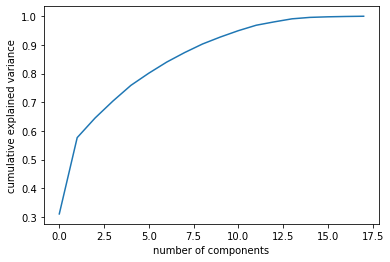

In [77]:
#Explained variance
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Our scree plot shows that the first 2 principal components describe most of the variation (information) within the data. This is a major reduction from the initial 18 features. Therefore, the first 2-3 eigenvectors should be used to construct the dimensions for the new feature space. 